## Music Genre Classification using Machine Learning

### Objective:  
To build a machine learning model that can classify audio tracks into their respective genres (e.g., Blues, Jazz, Rock, Pop) using audio feature extraction and classification algorithms.

### Description:

- Music genre classification is an application of audio signal processing and machine learning where audio files are analyzed to identify their genre. This project uses a dataset like GTZAN (with genres such as blues, jazz, rock, pop, etc.) and extracts audio features such as:

1. MFCC (Mel-Frequency Cepstral Coefficients)

2. Spectral Centroid

3. Spectral Roll-off

4. Chroma Features

5. Zero Crossing Rate

6. Tempo

- After feature extraction, the data is split into training and testing sets, and a machine learning model (such as K-Nearest Neighbors (KNN), Random Forest, or Support Vector Machines) is trained to classify the music tracks by genre.

- The project demonstrates skills in audio preprocessing, feature engineering, and classification algorithms.

### Workflow:
1. Introduction:
Understanding the art of classifying music genres through audio feature analysis and machine learning.

2. Libraries & Dataset Loading:
Importing essential libraries and loading the music features dataset.

4. Audio Waveform Visualization:
Visual examination of sample audio waveforms from different music genres.

5. Feature Correlation Analysis:
Analyzing relationships between audio features using a correlation heatmap.

6. Data Preprocessing:
Encoding labels, feature scaling, and preparing data for modeling.

7. Train-Test Data Splitting:
Splitting the dataset to evaluate model performance on unseen data.

8. Model Training & Evaluation with Traditional Algorithms:
Training Random Forest, CatBoost, and XGBoost classifiers and comparing accuracy.

9. Building & Training a Neural Network:
Designing and training a deep learning model for music genre classification.

10. Model Performance & Evaluation:
Evaluating test accuracy and visualizing learning curves for accuracy and loss.

11. Conclusion & Future Work
Summarizing findings and proposing improvements or next steps.

### Importing necessary libraries for data handling, visualization and audio processing

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio

### Loading the dataset metadata CSV file

In [2]:
music_data = pd.read_csv('file.csv')
music_data.head(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


### Exploratory Data Analysis (EDA)
Checking distribution of music genres in the dataset.

In [3]:
music_data['label'].value_counts()

,count
label,
blues,100
classical,100
country,100
disco,100
hiphop,100
jazz,100
metal,100
pop,100
reggae,100


### Audio Data Visualization
Loading and visualizing waveforms of sample audio files from different genres.


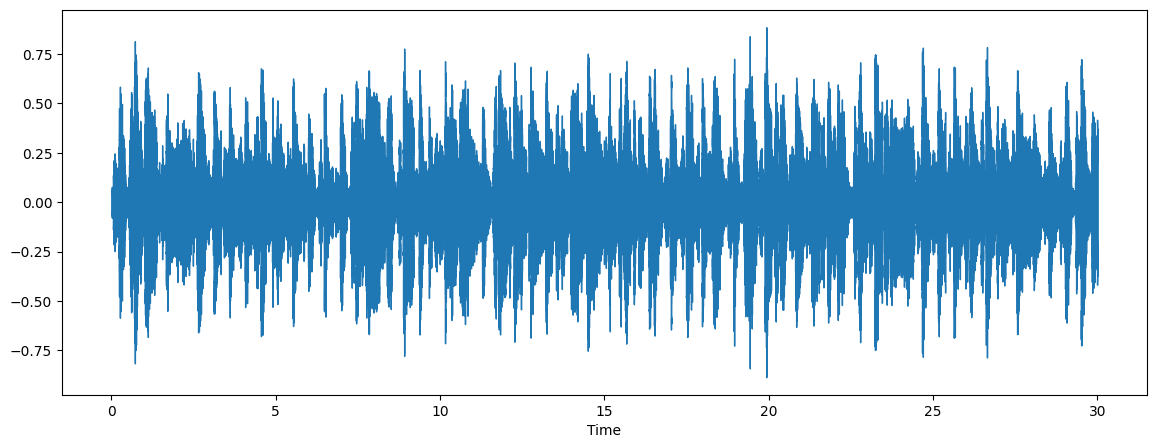

Blue


In [7]:
path = 'blues.00000.wav'           # path of the file
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)         # Load audio waveform and sampling rate#
librosa.display.waveshow(x, sr=sr) # Plotting waveform
plt.show()

Audio(path)                        # Play the audio in Notebook

print("Blue")

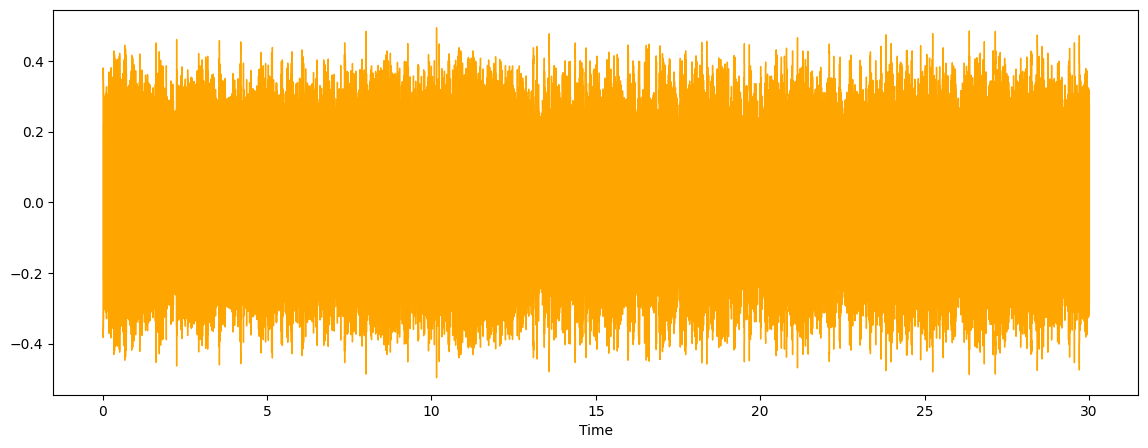

Metal


In [9]:
path = 'metal.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr, color='orange')
plt.show()

Audio(path)

print("Metal")

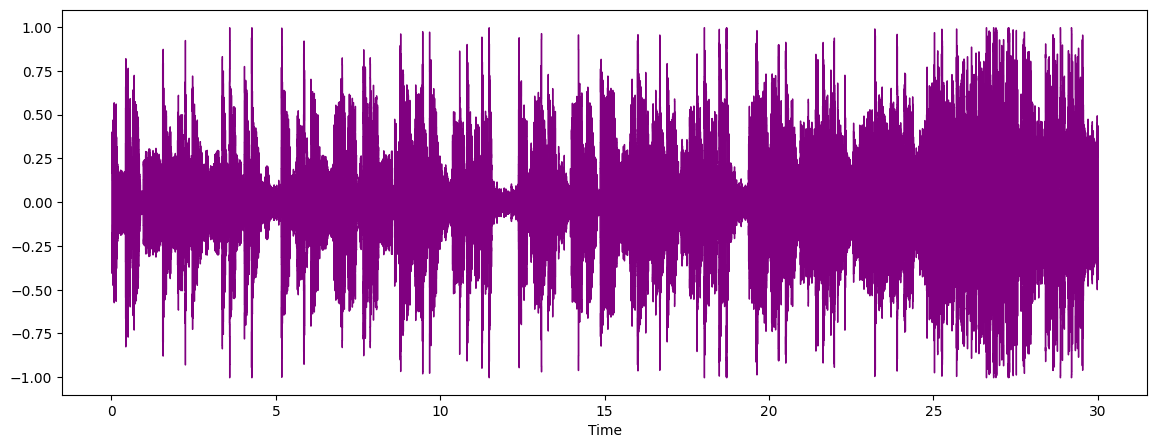

Pop


In [10]:
path = 'pop.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr, color='purple')
plt.show()

Audio(path)

print("Pop")

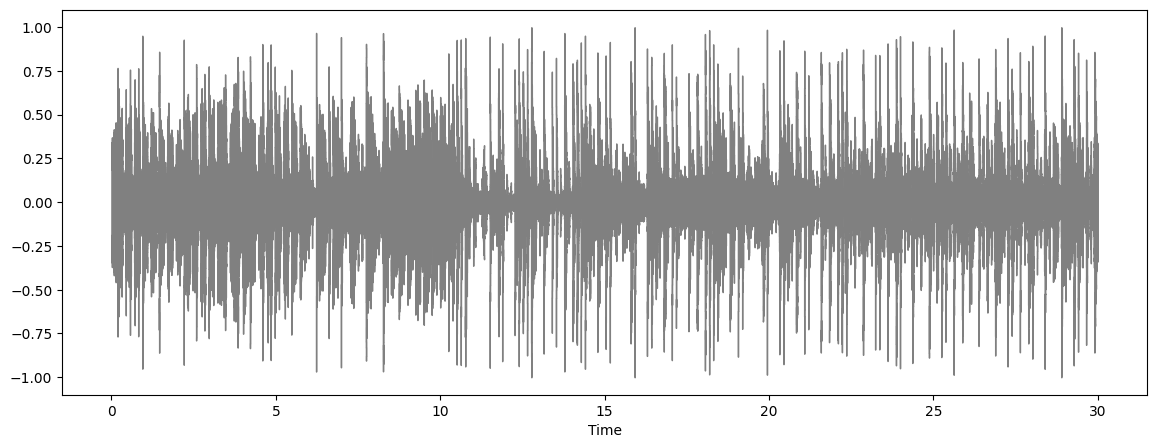

HipHop


In [12]:
path = 'hiphop.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr, color='grey')
plt.show()

Audio(path)

print("HipHop")

### Correlation Analysis
- Identifying columns with "mean" in their name and compute correlation matrix between these features.

- Visualizing the correlation matrix as a heatmap to understand relationships between features.


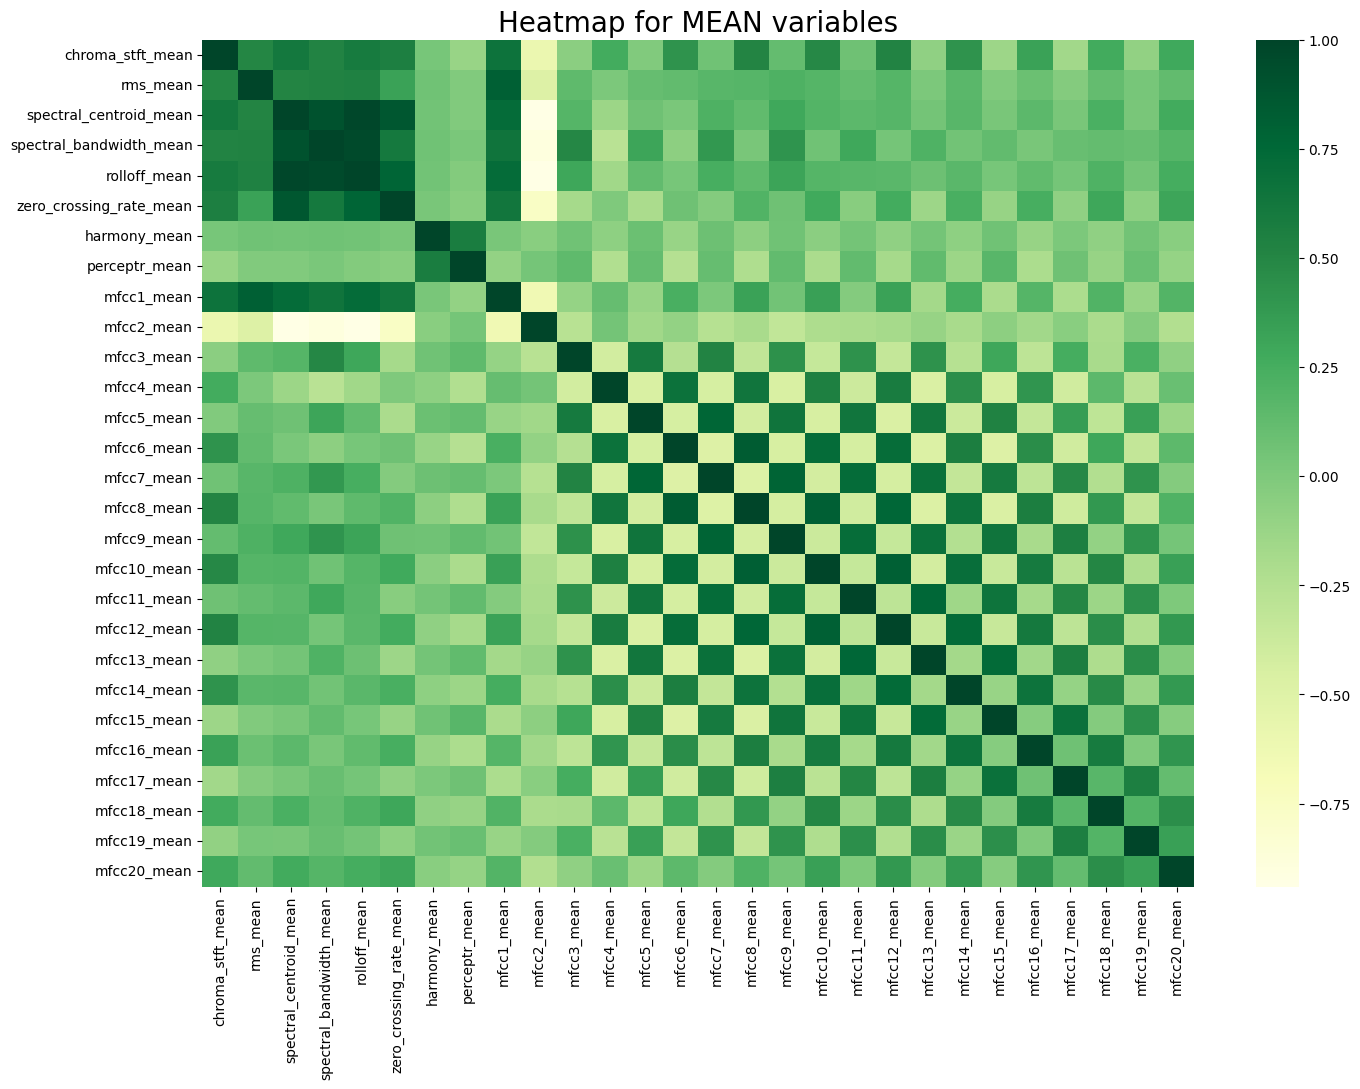

In [13]:
# Computing the Correlation Matrix
spike_cols = [col for col in music_data.columns if 'mean' in col]

# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(music_data[spike_cols].corr(), cmap='YlGn')

plt.title('Heatmap for MEAN variables', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

### Data Preprocessing

- Converting music genre labels from strings to numeric encoded integers for ML models.


In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
music_data['label'] = label_encoder.fit_transform(music_data['label'])

- Dropping irrelevant 'filename' column; separate features (X) and labels (y).

In [15]:
X = music_data.drop(['label','filename'],axis=1)
y = music_data['label']

- Scale features between 0 and 1 for better ML model convergence.

In [16]:
cols = X.columns
minmax = preprocessing.MinMaxScaler()
np_scaled = minmax.fit_transform(X)

# new data frame with the new scaled data.
X = pd.DataFrame(np_scaled, columns = cols)

### Train-Test Split

- Splitting dataset into training (70%) and testing (30%) sets to evaluate model performance.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 58), (300, 58), (700,), (300,))

In [20]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


### Model Training and Evaluation with Various Classifiers

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import catboost as cb
from xgboost import XGBClassifier

# Initialize models with tuned hyperparameters:
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
cbc = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass')
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)

# Train and evaluate each classifier, printing their accuracy score on the test data.
for clf in (rf, cbc, xgb):
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test, preds))

RandomForestClassifier 0.78
CatBoostClassifier 0.8333333333333334
XGBClassifier 0.7833333333333333


### Neural Network Model Construction

In [22]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout


In [23]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

model = Sequential()

model.add(Flatten(input_shape=(58,)))         # Flatten input features
model.add(Dense(256, activation='relu'))      # First dense (fully connected) layer
model.add(BatchNormalization())               # Normalization helps stabilize training
model.add(Dense(128, activation='relu'))      # Second dense layer
model.add(Dropout(0.3))                       # Regularization to prevent overfitting
model.add(Dense(10, activation='softmax'))    # Output layer: 10 classes using softmax
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 58)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        15,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,314 (196.54 KB)

 Trainable params: 49,802 (194.54 KB)

 Non-trainable params: 512 (2.00 KB)

### Compile and Train the Neural Network

In [25]:
adam = keras.optimizers.Adam(learning_rate=1e-4)         # Adam optimizer with learning rate 0.0001
model.compile(optimizer=adam,
              loss="sparse_categorical_crossentropy",    # suitable loss for integer labels
              metrics=["accuracy"])

hist = model.fit(X_train, y_train,
                 validation_data=(X_test, y_test),
                 epochs=100,
                 batch_size=32)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1115 - loss: 2.6137 - val_accuracy: 0.1000 - val_loss: 2.2956
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1958 - loss: 2.3131 - val_accuracy: 0.1500 - val_loss: 2.2719
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2678 - loss: 2.1426 - val_accuracy: 0.2100 - val_loss: 2.2473
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3366 - loss: 1.8852 - val_accuracy: 0.2833 - val_loss: 2.2197
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4107 - loss: 1.7642 - val_accuracy: 0.3000 - val_loss: 2.1900
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4424 - loss: 1.6668 - val_accuracy: 0.3333 - val_loss: 2.1569
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4852 - loss: 1.5590 - val_accuracy: 0.3867 - val_loss: 2.1203
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5210 - loss: 1.4999 - val_accuracy: 0.4500 - 

### Model Evaluation

In [26]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8115 - loss: 0.7359
Test accuracy: 0.7733333110809326


### Visualizing Training History

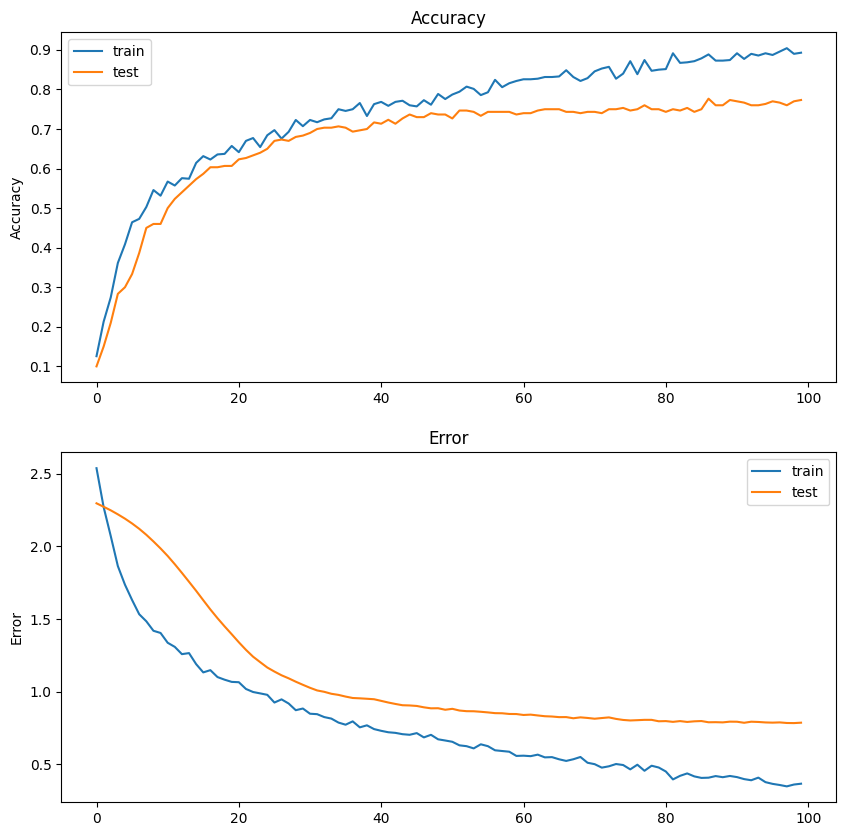

In [27]:
fig, axs = plt.subplots(2,figsize=(10,10))

# accuracy
axs[0].plot(hist.history["accuracy"], label="train")
axs[0].plot(hist.history["val_accuracy"], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")

# Error
axs[1].plot(hist.history["loss"], label="train")
axs[1].plot(hist.history["val_loss"], label="test")
axs[1].set_ylabel("Error")
axs[1].legend()
axs[1].set_title("Error")

plt.show()